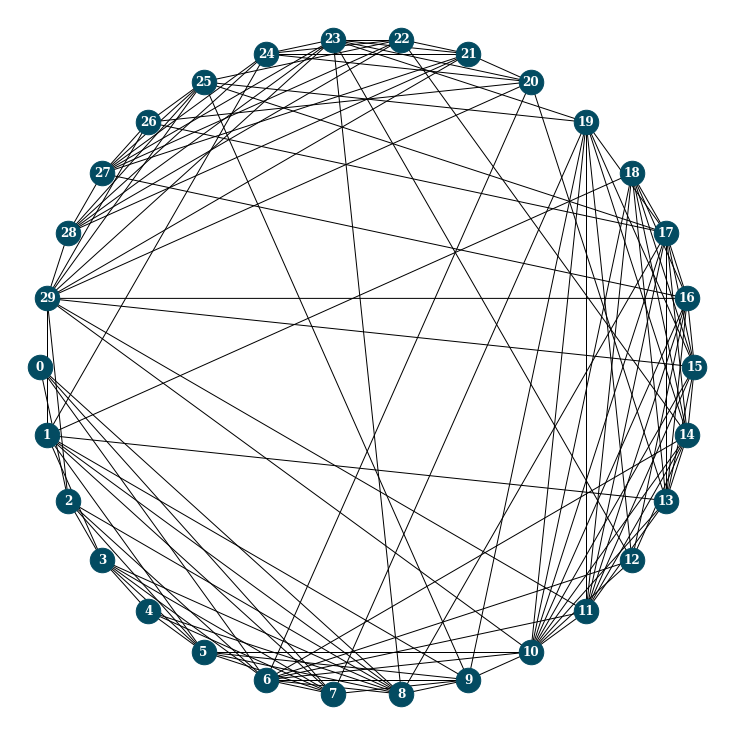

3


In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from networkx.algorithms import community
import random

# science and nature journal '#e3a6a1', '#bc5f6a', '#19b3b1', '#034b61'
# star sky science-fiction '#b2a59f', '#023459', '#1e646e', '#002c2f'
# delicate & shopping & pettyfashion '#b2d6ca', '#fe5858', '#024b40', '#5d353e'

colors = ['#fe5858', '#034b61', '#5d353e', '#b2d6ca']   
options = {'font_family': 'serif', 'font_weight': 'semibold', 'font_size': '12', 'font_color': '#ffffff'} 
savefig_path = 'D:/BaiduNetdiskDownload/社会网络分析/football'

def com_postion(size,scale=1, center=(0, 0), dim=2):
    # generat the postion for each nodes in a community
    num = size
    center = np.asarray(center)
    theta = np.linspace(0, 1, num+1)[:-1] * 2 * np.pi    
    theta = theta.astype(np.float32)
    pos = np.column_stack([np.cos(theta), np.sin(theta), np.zeros((num, 0))])
    pos = scale * pos + center
    return pos

def node_postion(one_com,scale=1, center=(0, 0), dim=2):
    # generat the postion for each nodes in a community
    num = len(one_com)
    node = list(one_com)
    center = np.asarray(center)
    theta = np.linspace(0, 1, num+1)[:-1] * 2 * np.pi   
    theta = theta.astype(np.float32)
    pos = np.column_stack([np.cos(theta), np.sin(theta), np.zeros((num, 0))])
    pos = scale * pos + center
    pos = dict(zip(node, pos))
    return pos

# ************************************************************************ #
# part 1--creat a graph
# ************************************************************************ #

G = nx.planted_partition_graph(3, 10, 0.7, 0.1)
plt.figure(figsize=(10,10))
pos = nx.shell_layout(G)
nx.draw(G, pos, with_labels=True, **options)
nx.draw_networkx_nodes(G, pos, node_size=600, node_color="#034b61") 
plt.savefig(savefig_path + 'original_network.png', format='png', dpi=500)
plt.show()

# ************************************************************************ #
# part 2--community detection
# ************************************************************************ #

com = community.greedy_modularity_communities(G) 
num_com = len(com)
print(num_com)